In [ ]:
# Imports nécessaires
import numpy as np
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import accuracy_score, confusion_matrix
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree
import joblib

# Chargement des données
data_path = r"C:\\Users\\colin\\Documents\\ESEO\\E5\\docsPFE\\creditcard_2023.csv"
df = pd.read_csv(data_path)

# Préparation des données
X = df.drop('Class', axis=1)  # Caractéristiques
y = df['Class']             # Cible
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

# Création du modèle de base
# Explications des hyperparamètres principaux :
# - n_estimators : nombre d'arbres dans la forêt
# - max_depth : profondeur maximale des arbres (None signifie sans limite)
# - min_samples_split : nombre minimum d'échantillons pour diviser un nœud
# - min_samples_leaf : nombre minimum d'échantillons dans une feuille
# - max_features : nombre maximum de caractéristiques à considérer pour diviser un nœud

modele_rf = RandomForestClassifier(
    n_estimators=100, 
    criterion='gini', 
    max_depth=None, 
    min_samples_split=2, 
    min_samples_leaf=1, 
    max_features='sqrt',
    random_state=42
)
modele_rf.fit(x_train, y_train)

# Évaluation du modèle de base
accuracy = accuracy_score(y_test, modele_rf.predict(x_test)) * 100
print(f"Précision du modèle de base : {accuracy:.2f} %")

# Optimisation des hyperparamètres avec GridSearchCV
iterations = [
    {
        'n_estimators': [20, 50, 100],
        'max_depth': [10, 20, 30],
        'min_samples_split': [2, 5, 10],
        'min_samples_leaf': [1, 2, 4]
    },
    {
        'n_estimators': [5, 10, 40],
        'max_depth': [15, 20, 40],
        'min_samples_split': [4, 5, 8],
        'min_samples_leaf': [1, 2]
    },
    {
        'n_estimators': [30, 40, 50],
        'max_depth': [20, 25, 30],
        'min_samples_split': [4],
        'min_samples_leaf': [1]
    },
    {
        'n_estimators': [35, 40, 45],
        'max_depth': [19, 20, 21],
        'min_samples_split': [4],
        'min_samples_leaf': [1]
    },
    {
        'n_estimators': [39, 40, 41],
        'max_depth': [19, 20, 21],
        'min_samples_split': [4],
        'min_samples_leaf': [1]
    },
    {
        'n_estimators': [38, 39],
        'max_depth': [20],
        'min_samples_split': [4],
        'min_samples_leaf': [1]
    }
]

best_params = None
best_score = 0

for i, param_grid in enumerate(iterations, 1):
    print(f"\nItération {i} :")
    grid_search = GridSearchCV(
        estimator=RandomForestClassifier(random_state=42),
        param_grid=param_grid,
        cv=3,  # Validation croisée
        n_jobs=-1,  # Utilisation de tous les cœurs
        verbose=5
    )
    grid_search.fit(x_train, y_train)
    print(f"Meilleurs paramètres pour l'itération {i} : {grid_search.best_params_}")
    print(f"Meilleur score de validation croisée pour l'itération {i} : {grid_search.best_score_:.2f}")

    if grid_search.best_score_ > best_score:
        best_score = grid_search.best_score_
        best_params = grid_search.best_params_

# Création du modèle optimisé
print(f"\nMeilleurs paramètres globaux : {best_params}")
print(f"Meilleur score global de validation croisée : {best_score:.2f}")

modele_rf_optimise = RandomForestClassifier(
    **best_params, 
    random_state=42
)
modele_rf_optimise.fit(x_train, y_train)

# Évaluation du modèle optimisé
accuracy_op = accuracy_score(y_test, modele_rf_optimise.predict(x_test)) * 100
print(f"Précision après optimisation : {accuracy_op:.2f} %")

# Sauvegarde et chargement du modèle optimisé
def save_model(model, filename):
    joblib.dump(model, filename)
    print(f"Modèle sauvegardé dans le fichier '{filename}'.")

def load_model(filename):
    model = joblib.load(filename)
    print(f"Modèle chargé depuis le fichier '{filename}'.")
    return model

save_model(modele_rf_optimise, "modele_rf_optimise.pkl")
modele_rf_optimise = load_model("modele_rf_optimise.pkl")

# Affichage de la matrice de confusion
predictions_optimise = modele_rf_optimise.predict(x_test)
confusion = confusion_matrix(y_test, predictions_optimise)
print("Matrice de confusion :")
print(confusion)

# Visualisation d'un arbre de la forêt
arbre = modele_rf_optimise.estimators_[0]  # Premier arbre
plt.figure(figsize=(20, 10))
plot_tree(
    arbre,
    feature_names=x_train.columns,
    class_names=['Non fraude (0)', 'Fraude (1)'],
    filled=True,
    rounded=True,
    fontsize=10
)
plt.title("Visualisation d'un arbre de la forêt")
plt.show()


Précision du modèle de base : 99.98 %

Itération 1 :
Fitting 3 folds for each of 81 candidates, totalling 243 fits


In [3]:
import numpy as np
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
import sklearn

In [4]:
df_tr = pd.read_csv(r"C:\Users\colin\Documents\ESEO\E5\docsPFE\creditcard_2023.csv")
#Séparation des données en caractéristiques (X) et cible (y)
X = df_tr.drop('Class', axis=1)
y = df_tr['Class']
x_train, x_test, y_train, y_test  = train_test_split(X,
                                                     y,
                                                     test_size=0.25,
                                                     random_state=42)
modele_rf = RandomForestClassifier(
     n_estimators=100,
     criterion='gini',
     max_depth=None,
     min_samples_split=2,
     min_samples_leaf=1,
     min_weight_fraction_leaf=0.0,
     max_features='sqrt',
     max_leaf_nodes=None,
     min_impurity_decrease=0.0,
     bootstrap=True,
     oob_score=False,
     n_jobs=None,
     random_state=None,
     verbose=0,
     warm_start=False,
     class_weight=None,
     ccp_alpha=0.0,
     max_samples=None,)

In [5]:
modele_rf.fit(x_train, y_train)

RandomForestClassifier()

In [24]:
from sklearn.metrics import accuracy_score, confusion_matrix
accuracy = accuracy_score(y_test, modele_rf.predict(x_test))*100
print(f"Le pourcentage de bien classés est de : {accuracy} %")

Le pourcentage de bien classés est de : 99.9831173764403 %


In [11]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'n_estimators': [20, 100, 150],
    'max_depth': [10, 20, 50],
    'criterion':['gini'],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    #'max_features': ['auto', 'sqrt'],
    #'bootstrap': [True, False]
}

grid_search = GridSearchCV(estimator=RandomForestClassifier(random_state=42), 
                           param_grid=param_grid, 
                           cv=3, 
                           n_jobs=-1, 
                           verbose=5)




In [12]:
grid_search.fit(x_train, y_train)

Fitting 3 folds for each of 81 candidates, totalling 243 fits


GridSearchCV(cv=3, estimator=RandomForestClassifier(random_state=42), n_jobs=-1,
             param_grid={'criterion': ['gini'], 'max_depth': [10, 20, 50],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [20, 100, 150]},
             verbose=5)

In [13]:
# Meilleurs paramètres
print(f"Meilleurs paramètres : {grid_search.best_params_}")
# Score sur le test
print(f"Meilleur score de validation croisée : {grid_search.best_score_}")

Meilleurs paramètres : {'criterion': 'gini', 'max_depth': 20, 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 20}
Meilleur score de validation croisée : 0.9997772421881895


In [14]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'n_estimators': [5,10,40],
    'max_depth': [15, 20, 40],
    'criterion':['gini'],
    'min_samples_split': [4, 5, 8],
    'min_samples_leaf': [1,2],
    #'max_features': ['auto', 'sqrt'],
    #'bootstrap': [True, False]
}

grid_search = GridSearchCV(estimator=RandomForestClassifier(random_state=42), 
                           param_grid=param_grid, 
                           cv=3, 
                           n_jobs=-1, 
                           verbose=5)
grid_search.fit(x_train, y_train)
# Meilleurs paramètres
print(f"Meilleurs paramètres : {grid_search.best_params_}")
# Score sur le test
print(f"Meilleur score de validation croisée : {grid_search.best_score_}")

Fitting 3 folds for each of 54 candidates, totalling 162 fits
Meilleurs paramètres : {'criterion': 'gini', 'max_depth': 20, 'min_samples_leaf': 1, 'min_samples_split': 4, 'n_estimators': 40}
Meilleur score de validation croisée : 0.9997795869805227


In [ ]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'n_estimators': [30,40,50],
    'max_depth': [20, 25, 30],
    'criterion':['gini'],
    'min_samples_split': [4],
    'min_samples_leaf': [1],
    #'max_features': ['auto', 'sqrt'],
    #'bootstrap': [True, False]
}

grid_search = GridSearchCV(estimator=RandomForestClassifier(random_state=42), 
                           param_grid=param_grid, 
                           cv=3, 
                           n_jobs=-1, 
                           verbose=5)
grid_search.fit(x_train, y_train)
# Meilleurs paramètres
print(f"Meilleurs paramètres : {grid_search.best_params_}")
# Score sur le test
print(f"Meilleur score de validation croisée : {grid_search.best_score_}")

Fitting 3 folds for each of 9 candidates, totalling 27 fits
Meilleurs paramètres : {'criterion': 'gini', 'max_depth': 20, 'min_samples_leaf': 1, 'min_samples_split': 4, 'n_estimators': 40}
Meilleur score de validation croisée : 0.9997795869805227


In [17]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'n_estimators': [35,40,45],
    'max_depth': [19,20,21],
    'criterion':['gini'],
    'min_samples_split': [4],
    'min_samples_leaf': [1],
    #'max_features': ['auto', 'sqrt'],
    #'bootstrap': [True, False]
}

grid_search = GridSearchCV(estimator=RandomForestClassifier(random_state=42), 
                           param_grid=param_grid, 
                           cv=3, 
                           n_jobs=-1, 
                           verbose=5)
grid_search.fit(x_train, y_train)
# Meilleurs paramètres
print(f"Meilleurs paramètres : {grid_search.best_params_}")
# Score sur le test
print(f"Meilleur score de validation croisée : {grid_search.best_score_}")

Fitting 3 folds for each of 9 candidates, totalling 27 fits
Meilleurs paramètres : {'criterion': 'gini', 'max_depth': 20, 'min_samples_leaf': 1, 'min_samples_split': 4, 'n_estimators': 40}
Meilleur score de validation croisée : 0.9997795869805227


In [18]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'n_estimators': [39,40,41],
    'max_depth': [19,20,21],
    'criterion':['gini'],
    'min_samples_split': [4],
    'min_samples_leaf': [1],
    #'max_features': ['auto', 'sqrt'],
    #'bootstrap': [True, False]
}

grid_search = GridSearchCV(estimator=RandomForestClassifier(random_state=42), 
                           param_grid=param_grid, 
                           cv=3, 
                           n_jobs=-1, 
                           verbose=5)
grid_search.fit(x_train, y_train)
# Meilleurs paramètres
print(f"Meilleurs paramètres : {grid_search.best_params_}")
# Score sur le test
print(f"Meilleur score de validation croisée : {grid_search.best_score_}")

Fitting 3 folds for each of 9 candidates, totalling 27 fits
Meilleurs paramètres : {'criterion': 'gini', 'max_depth': 20, 'min_samples_leaf': 1, 'min_samples_split': 4, 'n_estimators': 39}
Meilleur score de validation croisée : 0.9997795870135118


In [22]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'n_estimators': [38,39],
    'max_depth': [20],
    'criterion':['gini'],
    'min_samples_split': [4],
    'min_samples_leaf': [1]
}

grid_search = GridSearchCV(estimator=RandomForestClassifier(random_state=42), 
                           param_grid=param_grid, 
                           cv=3, 
                           n_jobs=-1, 
                           verbose=5)
grid_search.fit(x_train, y_train)
# Meilleurs paramètres
print(f"Meilleurs paramètres : {grid_search.best_params_}")
# Score sur le test
print(f"Meilleur score de validation croisée : {grid_search.best_score_}")

Fitting 3 folds for each of 2 candidates, totalling 6 fits
Meilleurs paramètres : {'criterion': 'gini', 'max_depth': 20, 'min_samples_leaf': 1, 'min_samples_split': 4, 'n_estimators': 39}
Meilleur score de validation croisée : 0.9997795870135118


In [25]:
modele_rf_optimise = RandomForestClassifier(
     n_estimators=39,
     criterion='gini',
     max_depth=20,
     min_samples_split=4,
     min_samples_leaf=1,
     min_weight_fraction_leaf=0.0,
     max_features='sqrt',
     max_leaf_nodes=None,
     min_impurity_decrease=0.0,
     bootstrap=True,
     oob_score=False,
     n_jobs=None,
     random_state=None,
     verbose=0,
     warm_start=False,
     class_weight=None,
     ccp_alpha=0.0,
     max_samples=None,)
modele_rf_optimise.fit(x_train, y_train)
accuracy_op = accuracy_score(y_test, modele_rf_optimise.predict(x_test))*100
print(f"Le pourcentage de bien classés après optimisation est de : {accuracy_op} %")
print(f"Le pourcentage de bien classés est de : {accuracy} %")

Le pourcentage de bien classés après optimisation est de : 99.98100704849534 %
Le pourcentage de bien classés est de : 99.9831173764403 %


In [27]:
import joblib

# Enregistrement du modèle entraîné
joblib.dump(modele_rf_optimise, "modele_rf_optimise.pkl")
print("Modèle sauvegardé dans le fichier 'modele_rf_modele_rf_optimise.pkl'")

Modèle sauvegardé dans le fichier 'modele_rf_modele_rf_optimise.pkl'


In [28]:
# Chargement du modèle enregistré
modele_rf_optimise = joblib.load("modele_rf_optimise.pkl")
print("Modèle chargé avec succès.")

# Utilisation du modèle pour effectuer des prédictions
predictions_optimise = modele_rf_optimise.predict(x_test)
print(f"Le pourcentage de bien classés est de : {accuracy_score(y_test, predictions_optimise)*100} %")

# Afficher la matrice de confusion
confusion = confusion_matrix(y_test, predictions_optimise)
print("Matrice de confusion :")
print(confusion)


Modèle chargé avec succès.
Le pourcentage de bien classés est de : 99.98100704849534 %
Matrice de confusion :
[[71013    10]
 [   17 71118]]


In [29]:
def save_model(model, filename):
    import joblib
    joblib.dump(model, filename)
    print(f"Modèle sauvegardé dans le fichier '{filename}'.")

def load_model(filename):
    import joblib
    model = joblib.load(filename)
    print(f"Modèle chargé depuis le fichier '{filename}'.")
    return model


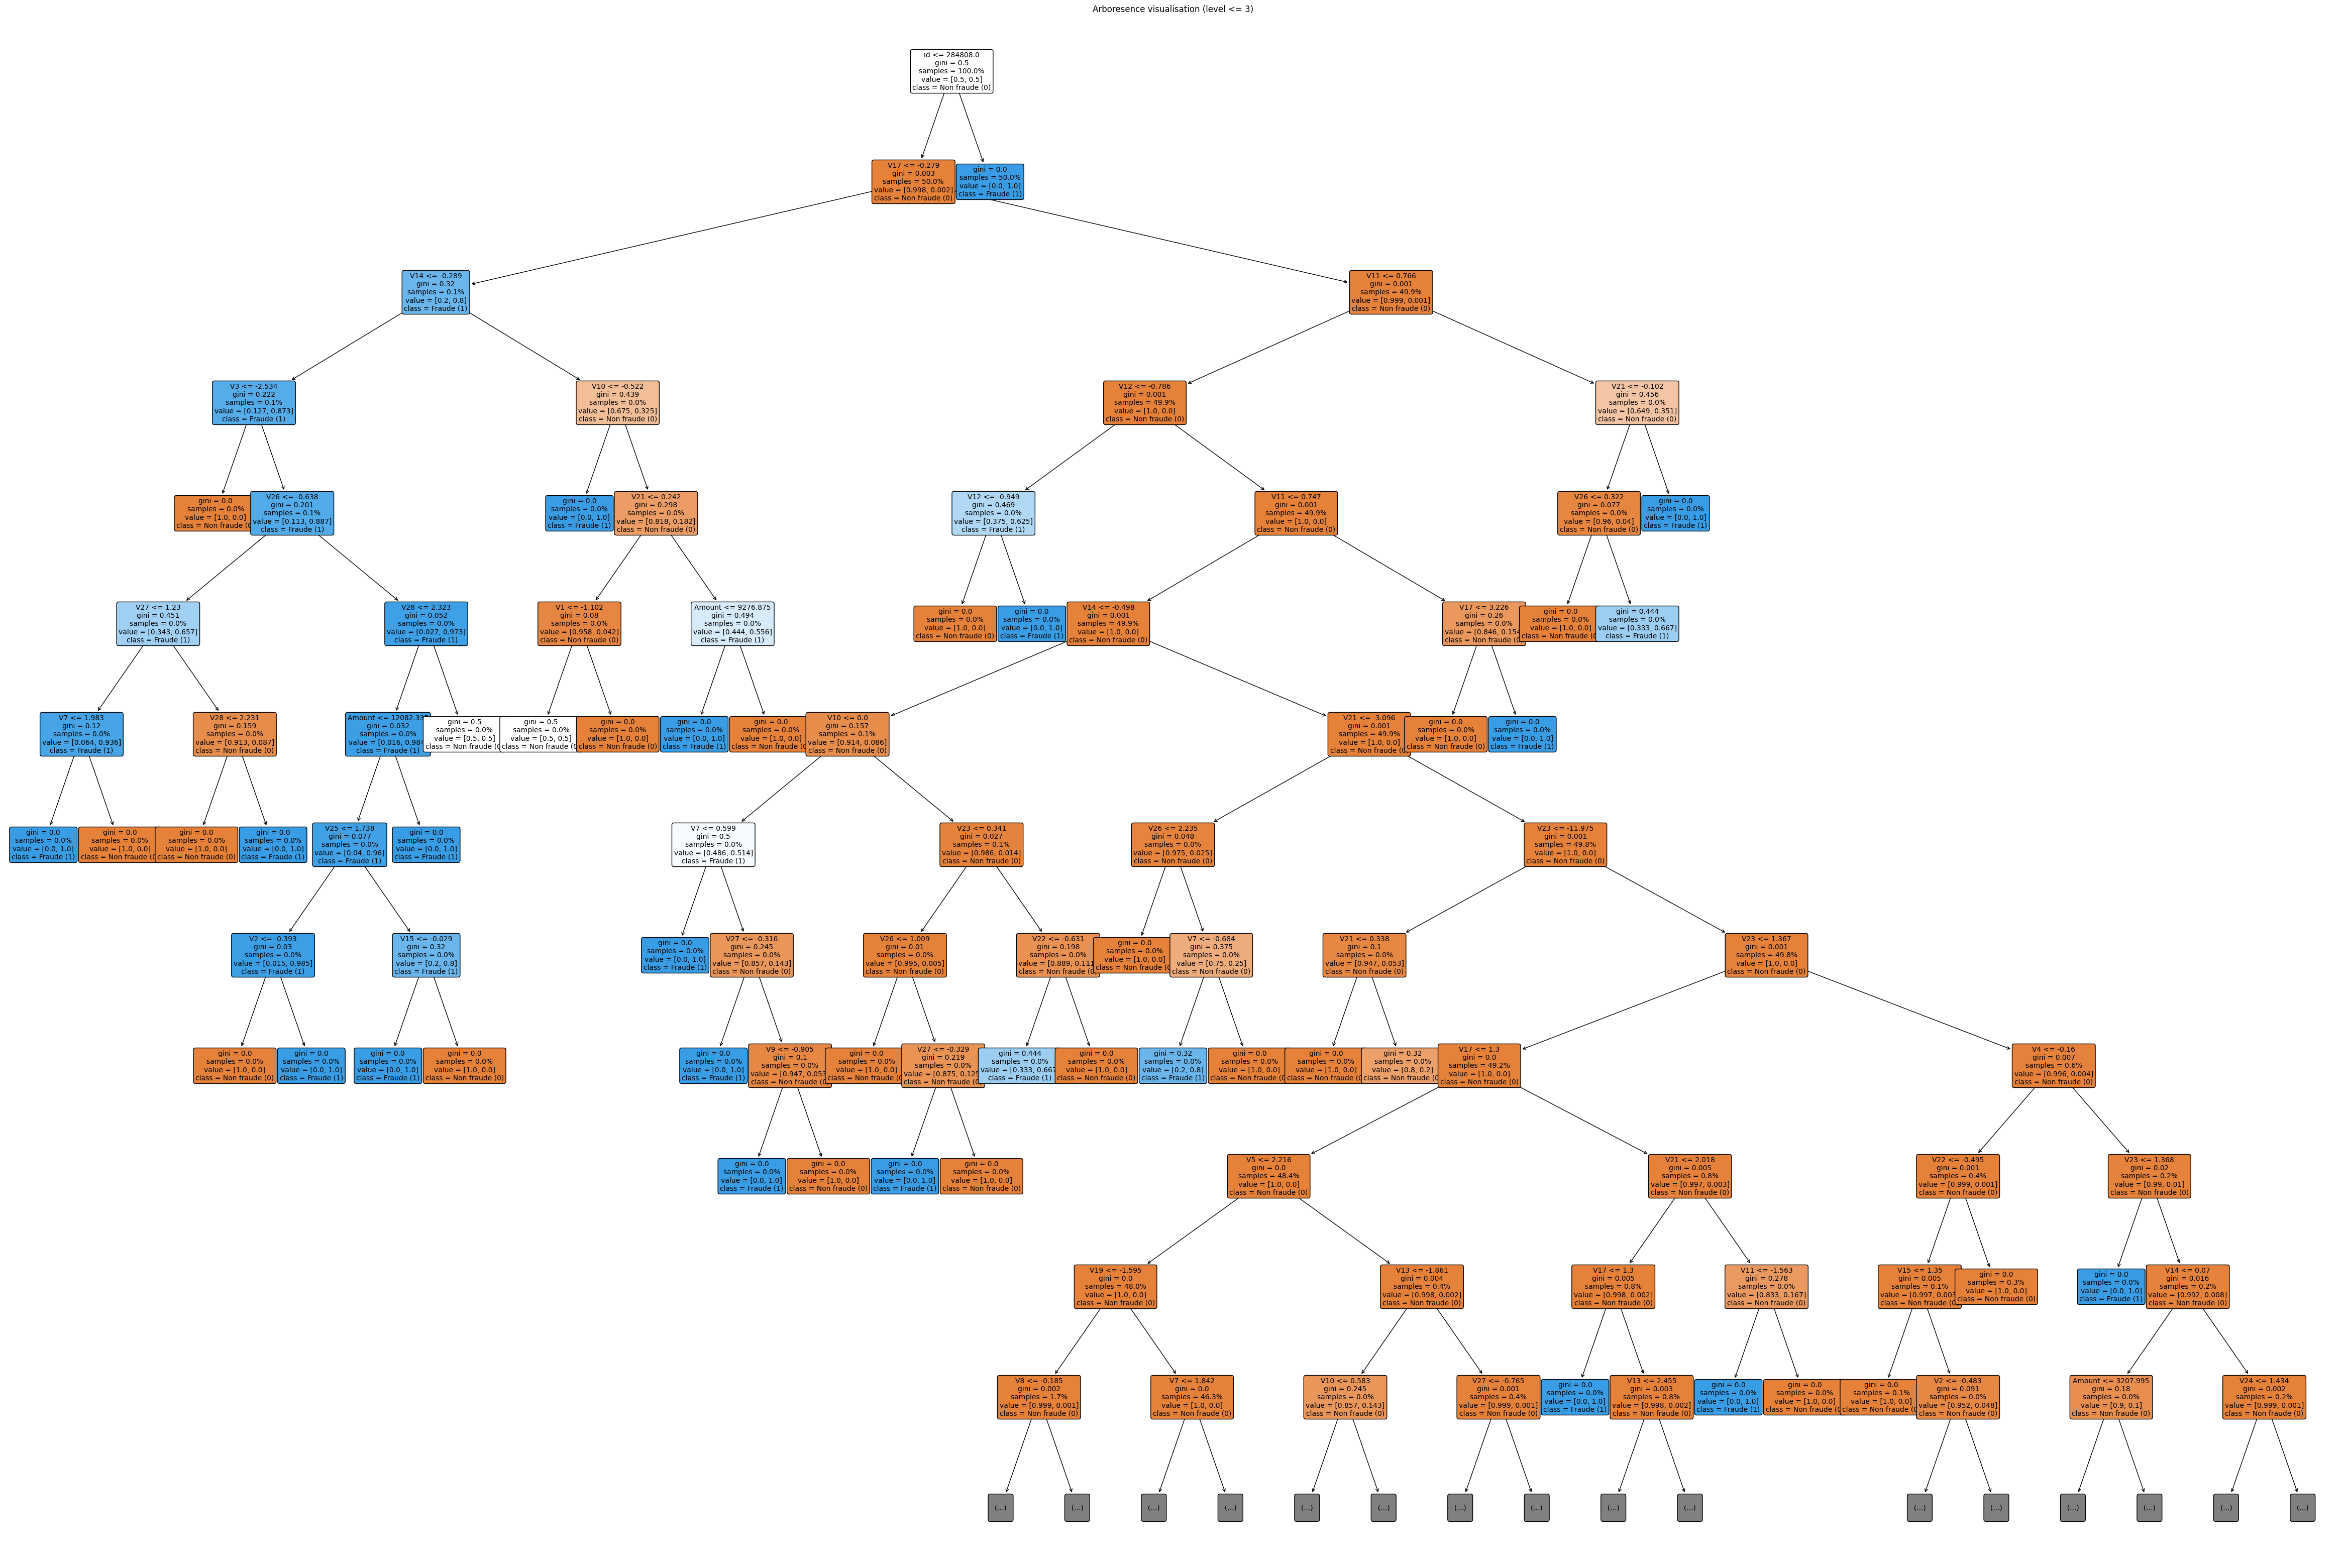

In [33]:
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

# Sélectionner le premier arbre de la Random Forest
arbre = modele_rf_optimise.estimators_[0]  # Premier arbre de la forêt

# Visualisation de l'arbre jusqu'au niveau 3
plt.figure(figsize=(60, 40))
tree_plot = plot_tree(
    arbre,
    max_depth=12,  # Limiter la profondeur d'affichage
    feature_names=x_train.columns,
    class_names=['Non fraude (0)', 'Fraude (1)'],
    filled=True,  # Coloration des noeuds
    rounded=True,  # Forme arrondie des noeuds
    fontsize=10,
    proportion=True,  # Afficher les proportions
)

# Ajuster la couleur de fond des noeuds pour la fraude et non fraude
ax = plt.gca()  # Récupérer l'axe du graphique
annotations = ax.get_children()

# Modifier les couleurs des cases (nœuds) en fonction de la classe (fraude ou non-fraude)
for ann in annotations:
    if isinstance(ann, plt.Rectangle):  # Chercher les cases (rectangles)
        # Récupérer le texte dans la case
        if "Fraude" in ann.get_label():
            ann.set_facecolor("red")  # Fraude en rouge
        elif "Non fraude" in ann.get_label():
            ann.set_facecolor("blue")  # Non fraude en bleu

# Mettre le titre et afficher le graphique
plt.title("Arboresence visualisation (level <= 3)")
plt.show()



1. Réduction de n_estimators (de 100 à 39)

    Impact :
        Réduire le nombre d'arbres diminue le temps d'entraînement et de prédiction.
        Cela peut suffire si le modèle atteint une performance optimale avec moins d'arbres.
    Raisons :
        Le processus d'optimisation a identifié qu'un nombre inférieur d'arbres suffit pour capter les patterns dans les données sans perte significative de précision.
        Trop d'arbres peuvent entraîner un modèle inutilement lourd, augmentant la complexité computationnelle sans améliorer les résultats.

2. Limitation de max_depth (de None à 20)

    Impact :
        Fixer une profondeur maximale limite la complexité de chaque arbre.
        Réduit le risque de surapprentissage (overfitting) en évitant des arbres trop spécifiques aux données d'entraînement.
    Raisons :
        Une profondeur illimitée permet aux arbres de surajuster les données, surtout avec des caractéristiques redondantes ou bruitées.
        La profondeur optimale de 20 équilibre la capacité d'apprentissage des relations dans les données et la généralisation sur de nouvelles données.

3. Augmentation de min_samples_split (de 2 à 4)

    Impact :
        Augmenter la valeur de min_samples_split empêche le modèle de diviser un nœud avec très peu de données, ce qui peut réduire le surajustement.
        Cela rend chaque arbre moins complexe.
    Raisons :
        Une valeur plus élevée impose un seuil minimal pour qu'un nœud soit divisé, ce qui peut améliorer la robustesse en forçant l'algorithme à chercher des patterns dans des groupes de données plus larges.

4. Stabilité de min_samples_leaf (reste à 1)

    Impact :
        Maintenir min_samples_leaf à 1 permet aux arbres de modéliser les données rares ou peu fréquentes.
    Raisons :
        Le modèle n'a pas besoin de limiter davantage le nombre minimal d'échantillons dans les feuilles. Une augmentation pourrait réduire la capacité à capturer les petites variations utiles des données.

5. Absence de changement pour d'autres paramètres (max_features='sqrt', etc.)

    Impact :
        Les paramètres non modifiés, comme max_features='sqrt', sont déjà optimaux dans la plupart des cas. Par exemple, utiliser la racine carrée du nombre de caractéristiques pour la sélection des splits est une valeur standard pour la classification.
    Raisons :
        Ces paramètres n’ont pas un impact significatif sur la performance globale dans votre cas, ou leur valeur par défaut est déjà bien adaptée.

Pourquoi ces changements ?

Ces modifications des hyperparamètres visent à trouver un équilibre optimal entre biais et variance :

    Réduction du surajustement (variance) :
        Limiter la profondeur des arbres (max_depth).
        Augmenter min_samples_split pour éviter des divisions inutiles.
    Amélioration de l'efficacité computationnelle :
        Réduire le nombre d'arbres (n_estimators).
    Maintien d'une performance élevée :
        Les paramètres inchangés, comme max_features='sqrt', fonctionnent bien pour les caractéristiques du dataset.